In [8]:
from models import *
from datetime import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import shutil
import os
from random import random

print("Tensorflow version: ", tf.__version__)
print("Numpy version: ", np.__version__)

excel_reports = ".\Excel reports"
saved_models = ".\Saved models"
trained_models = ".\Trained models"
tested_models = ".\Tested models"
temp = ".\Temp"

# Initiate parameters
ticker = 'clb'
period = "1wk" 
shuffle = False

eod_data_api = False
api_key = '631505e804ec58.42743136'

sentiment = True
# Sentiment types... APISentiment	VaderSentiment	CombinedVaderSentiment RobertaLargeSentiment #TwitterSentiment
sentiment_type = 'CombinedVaderSentiment'
aggr_function = 'median'

formation_window = 5
target_window = 1

#Split Ratios
split_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15
export_excels = False

#trade condition
condition = False

# EMA indicators
indicator1 = 6
indicator2 = 24
indicator3 = 36

# Do not change
window_size = formation_window + 1

if sentiment == False:
    news_df = None
if sentiment_type == 'TwitterSentiment':
    twitter = True
else:
    twitter = False
    
# Print stuffs
print("\nwindow size: ", window_size)
print("formation_window: ", formation_window)
print("target_window: ", target_window)
print("chart period: ", period)

# training batches
batch_size_train = 6
batch_size_valid = 2

# Period model is trained and tested
start_date = '2019-01-01'  
end_date = '2023-01-11'  

# #Delete folders
# shutil.rmtree(excel_reports)
# shutil.rmtree(saved_models)
# shutil.rmtree(trained_models)
# shutil.rmtree(tested_models)
# shutil.rmtree(temp)

# Create folder, if exist pass exception
try:
    os.mkdir("Excel reports")
    os.mkdir("Saved models")
    os.mkdir("Trained models")
    os.mkdir("Tested models")
    os.mkdir("Temp")
except:
    pass


Tensorflow version:  2.9.1
Numpy version:  1.23.1

window size:  6
formation_window:  5
target_window:  1
chart period:  1wk


In [9]:
if sentiment == True:

    from sentiment import GetNews

    GetNewsAPI = GetNews()

    GetNewsAPI.fit(ticker=ticker, start_date=start_date, end_date=end_date,
                   n_news=1000, token=api_key, offset=0, export_excel=True, twitter=twitter)
    news_df = GetNewsAPI.transform()
#news_df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


--------> GetNews completed



In [10]:
from transformers_preprocess import PullData

GetData = PullData()

print("ticker: ",ticker)
print("EOD api: ",eod_data_api)

GetData.fit(ticker=ticker,
            start_date=start_date,
            end_date=end_date,
            interval=period,  # 1wk
            progress=False,
            condition=condition,
            form_window=formation_window,
            target_window=target_window,
            timeperiod1=indicator1,#6
            timeperiod2=indicator2,#12
            timeperiod3=indicator3,#24
            export_excel=export_excels,
            excel_path=excel_reports,
            listed_conditions=None,
            sentiment=sentiment,
            sentiment_type=sentiment_type, #sentiment_type
            news_df=news_df,
            chart_period=period,
            sentiment_aggr=aggr_function,
            )

data_prep = GetData.transform()

# Validation
if window_size != (formation_window + 1):
    raise Exception(
        f"Error - window_size ({window_size}) must be equal to sum of formation_window ({formation_window}) and value 1.")
data_prep.head(20)


ticker:  clb
EOD api:  False
initial shape:  (227, 6)


,Date,Open,High,Low,Close,EMA6,EMA24,EMA36,CombinedVaderSentiment,trades
0,2018-12-31 00:00:00,59.610001,64.190002,57.840000,62.950001,66.985001,63.331667,57.939167,0.0,1
1,2019-01-07 00:00:00,63.240002,70.629997,62.709999,68.910004,66.985001,63.331667,57.939167,0.0,1
2,2019-01-14 00:00:00,68.089996,71.459999,66.559998,70.500000,66.985001,63.331667,57.939167,0.0,1
3,2019-01-21 00:00:00,69.239998,69.239998,65.330002,68.080002,66.985001,63.331667,57.939167,0.0,1
4,2019-01-28 00:00:00,66.800003,71.019997,65.150002,67.599998,66.985001,63.331667,57.939167,0.0,1
0,Month,67.500000,69.500000,63.090000,63.869999,66.985001,63.331667,57.939167,0.0,1
1,2019-01-07 00:00:00,63.240002,70.629997,62.709999,68.910004,66.985001,63.331667,57.939167,0.0,2
2,2019-01-14 00:00:00,68.089996,71.459999,66.559998,70.500000,66.985001,63.331667,57.939167,0.0,2
3,2019-01-21 00:00:00,69.239998,69.239998,65.330002,68.080002,66.985001,63.331667,57.939167,0.0,2
4,2019-01-28 00:00:00,66.800003,71.019997,65.150002,67.599998,66.985001,63.331667,57.939167,0.0,2


In [11]:
####################################################################

from transformers_preprocess import NormalizeData

NormalizeData = NormalizeData()

NormalizeData.fit(window_size=window_size, shuffle=shuffle, debug=False,
                  export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment)

data_normalized, Dates = NormalizeData.transform(data_prep)
data_normalized.head()
# Get only forecasts for model testing
# x_valid_x = data_normalized[['maxv','minv']].copy() #extreme values for reverting normalization
# x_valid = data_normalized.iloc[:,:-2].copy() #dataset for forecast
Dates


Dataframe shape:  (1236, 10)
Number of formations:  206
--------> NormalizeData completed



0      2018-12-31 00:00:00
1      2019-01-07 00:00:00
2      2019-01-14 00:00:00
3      2019-01-21 00:00:00
4      2019-01-28 00:00:00
              ...         
206    2022-12-12 00:00:00
207    2022-12-19 00:00:00
208    2022-12-26 00:00:00
209    2023-01-02 00:00:00
0                    Month
Name: Date, Length: 1236, dtype: object

In [12]:
####################################################################

from training import SplitData

SplitData = SplitData()

SplitData.fit(split_ratio=split_ratio, window_size=window_size,
              dates=Dates, debug=False, export_excel=export_excels, excel_path=excel_reports, sentiment=sentiment,validation_set=validation_ratio, test_set=test_ratio)

x_train, x_valid, x_test, x_train_x, x_valid_x, x_test_x,_ = SplitData.transform(data_normalized)
# x_train.head(25)



DF Shape:  (1236, 10)
train_split split:  864
validation split:  186
total validation windows:  62.0

Split train ratio: 70 %
Split validation ratio: 15 %
Split test ratio: 15 %

train period: 2018-12-31 - 2021-10-25
valid period: 2021-10-04 - 2022-05-30
test period: 2022-05-09 - 2023-01-02

Total Windows:  206.0
x_train windows:  144.0
x_valid windows:  31.0
x_test windows:  31.0
--------> SplitData completed



In [13]:
from training import GetTensoredDataset

GetTensoredDataset = GetTensoredDataset()

GetTensoredDataset.fit(window_size=window_size, batch_size=batch_size_train, train=True, debug=False)

x_train_tensors, _ = GetTensoredDataset.transform(x_train)

# c = 0
# for batch in x_train_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break

--------> GetTensoredDataset completed



In [14]:
from training import GetTensoredDataset

GetTensoredValidDataset = GetTensoredDataset()

GetTensoredValidDataset.fit(
    window_size=window_size, batch_size=batch_size_valid, train=False, debug=False)

x_valid_tensors, _ = GetTensoredValidDataset.transform(x_valid)
x_test_tensors, labels = GetTensoredValidDataset.transform(x_test)
# for batch in x_valid_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break


--------> GetTensoredDataset completed

--------> GetTensoredDataset completed



<b>Model Training</b>

In [15]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

datetime_ = datetime.today().date()
number = int(random()*10000)
model_name_ = f'{ticker}_model_{datetime_}_{number}.h5'
model_name = f'{saved_models}/{model_name_}'

early_stopping = EarlyStopping(
    monitor='val_loss', patience=6, mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=2, min_lr=10e-15,
                              verbose=0)

model_checkpoint = ModelCheckpoint(monitor='val_loss',
                                   filepath=model_name,
                                   save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true*y_pred, 0),
                    penalty * tf.square(y_true-y_pred),
                    tf.square(y_true - y_pred)
                    )

    return(tf.reduce_mean(loss, axis=-1))


tf.keras.losses.sign_penalty = sign_penalty


Bellow code is used to find the best model architecture, recommended to use cloud computing

In [16]:
# from testing import get_models,optimize
# from datetime import datetime
# start_time = datetime.now().strftime("%H:%M:%S")
# start = datetime.now()
# print("Training started at ",start_time)
# tf.random.set_seed(7788)
# np.random.seed(7788)

# # #Permutation testing
# # num_layers = 2
# # min, max = 2, 4
# # node_step_size = 2
# # node_options = list(range(min, max + 1, node_step_size))
# # two_layer_possibilities = [node_options, node_options]
# # layer_node_permutations  = list(itertools.product(*two_layer_possibilities))

# f_df = pd.DataFrame()

# for layer in range(7,8):
#     progress_time = datetime.now().strftime("%H:%M:%S")
#     print("\n------ > Layer: ",layer)
#     print("Layer loop started: ",progress_time)

#     all_models, names = get_models(num_layers=layer, min=2, max=4, node_step_size=2, features=x_train.shape[1])

#     progress_time = datetime.now().strftime("%H:%M:%S")
#     print("Models: ",len(all_models))
#     print("Models constructed: ",progress_time)
    
#     optimizing_df = optimize(models=all_models,X_train=x_train_tensors,X_valid=x_valid_tensors,X_test=x_valid,labels=labels,epochs=1000,verbose=0,window_size=window_size,callbacks=callbacks,layer=layer,ticker=ticker,excel_path=tested_models)
# # optimizing_df
#     #f_df = f_df.append(optimizing_df)
    
# end_time = datetime.now().strftime("%H:%M:%S")
# end = datetime.now()
# print("\nTraining ended at ",end_time) 
# print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")

Get Model

In [17]:
from datetime import datetime
start_time = datetime.now().strftime("%H:%M:%S")
start = datetime.now()
print("Training started at ",start_time)

tf.random.set_seed(7788)
np.random.seed(7788)
features = x_train.shape[1]

print(f"Model training - {str.upper(ticker)} \n")
def mrk_model(features: int):
    model = tf.keras.models.Sequential([

        tf.keras.layers.Conv1D(filters=8, kernel_size=1,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               input_shape=[None, features]),
        tf.keras.layers.Conv1D(filters=16, kernel_size=1,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               #input_shape=[None, 7]
                               ),
        tf.keras.layers.Conv1D(filters=32, kernel_size=10,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               #input_shape=[None, 7]
                               ),

        tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(3, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(3)),
        tf.keras.layers.Dense(4, activation=tf.nn.selu),
        tf.keras.layers.Dense(3, activation=tf.nn.selu),
        tf.keras.layers.Dense(2, activation=tf.nn.selu),
        tf.keras.layers.Dense(1, activation=tf.nn.relu),
    ])
    return model
    
model = mrk_model(features)


optimizer2 = tf.keras.optimizers.Adam(
            learning_rate=0.00007, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
optimizer5 = tf.keras.optimizers.Adagrad(
    learning_rate=0.0006, initial_accumulator_value=5, epsilon=1e-07, name='Adagrad')

model.compile(loss=sign_penalty,
              optimizer=optimizer5
              )

model.fit(x_train_tensors, epochs=1000, callbacks=[callbacks], validation_data=x_valid_tensors,verbose=1)


end_time = datetime.now().strftime("%H:%M:%S")
end = datetime.now()
print("\nTraining ended at ",end_time) 
print(f"Training ended in {round((end-start).total_seconds(),2)} seconds")



Training started at  23:28:32
Model training - CLB 

Epoch 1/1000
24/24 [==============================] - 9s 155ms/step - loss: 0.3608 - val_loss: 0.5006 - lr: 6.0000e-04
Epoch 2/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.3461 - val_loss: 0.4881 - lr: 6.0000e-04
Epoch 3/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.3269 - val_loss: 0.4682 - lr: 6.0000e-04
Epoch 4/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.3063 - val_loss: 0.4467 - lr: 6.0000e-04
Epoch 5/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.2876 - val_loss: 0.4243 - lr: 6.0000e-04
Epoch 6/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.2714 - val_loss: 0.3995 - lr: 6.0000e-04
Epoch 7/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.2542 - val_loss: 0.3719 - lr: 6.0000e-04
Epoch 8/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.2354 - val_loss: 0.3418 - lr: 6.0000e-04
Ep

In [18]:
from functions import model_forecast
forecast = model_forecast(model, x_test, window_size=window_size, debug=False)


31/31 [==============================] - 2s 3ms/step


In [19]:
from transformers_preprocess import ReverseNormalization

ReverseNormalization = ReverseNormalization()

ReverseNormalization.fit(forecasts=forecast, labels=labels,
                         x_test=x_test, x_test_x=x_test_x, window_size=window_size, debug=False,
                         sentiment=sentiment,sentiment_type=sentiment_type)

df = ReverseNormalization.transform()
#df.head(25)

--------> ReverseNormalization completed



In [20]:
from final_evaluation import GetFinalDataframe

GetFinalDataframe = GetFinalDataframe()

GetFinalDataframe.fit(dates=Dates,
                      x_test=x_test,
                      sentiment=sentiment,
                      sentiment_type=sentiment_type)

reversed_df = GetFinalDataframe.transform(df)
#reversed_df.head(10)


--------> GetFinalDataframe



In [21]:
from final_evaluation import GetModelPerformance
#print(f"Window size: {window_size} \n")
print(f"ticker: {str.upper(ticker)}\n")
GetModelPerformance = GetModelPerformance()

GetModelPerformance.fit(acceptance=0,
                        penalization=0,
                        entry_candle='Current Open',#Current Open
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports,
                        sentiment=sentiment)

trades_df = GetModelPerformance.transform(reversed_df)
#trades_df.head(25)


ticker: CLB

Formations:  31
period: 2022-05-09 - 2023-01-02
Entry Candle:  Current Open

Total Trades:  25
Profit Trades:  16
Loss Trades:  9

Win Ratio: 64.0 %
Loss Ratio: 36 %

Trade nr with exact TP:  4
Ratio of exact TP: 16.0 %

Average profit per trade:  306

Gross profit:  7659
Gross loss:  -7778

Net profit:  -119


In [22]:
trade = 2
budget = 10000
entry_candle = 'Current Open'
df = trades_df.head(3)


Trade:  2
Window size:  6
Period: 2022-05-16 - 2022-06-13

Budget:  10000

Entry price:  20.73
Label (target):  21.66
Model prediction:  25.81
Market Change: -1.6 $
Profit: -771.83 $


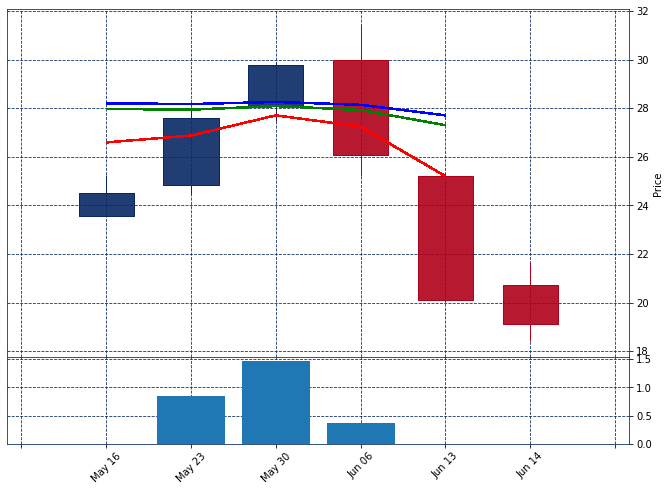

,Open,High,Low,Close,EMA6,EMA24,EMA36,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade
In,,,,,,,,,,,,,
6,23.549999,25.250000,23.549999,24.520000,26.588662,27.967750,28.200629,nn,nn,0.0000,2022-05-16,-1.6,2
7,24.840000,28.049999,24.480000,27.580000,26.871902,27.936730,28.167081,nn,nn,0.8369,2022-05-23,-1.6,2
8,28.090000,29.879999,27.450001,29.780001,27.702787,28.084191,28.254266,nn,nn,1.4610,2022-05-30,-1.6,2
9,30.000000,31.420000,25.190001,26.080000,27.239134,27.923856,28.136738,nn,nn,0.3750,2022-06-06,-1.6,2
10,25.190001,25.340000,20.040001,20.090000,25.196524,27.297148,27.701780,nn,nn,0.0000,2022-06-13,-1.6,2
11,20.730000,21.660000,18.410000,19.129999,26.871902,27.936730,28.167081,21.66,25.807832,0.0000,2022-06-14,-1.6,2


In [25]:
#trade = 4
from plotting import PlotTrade

df = PlotTrade(trade=trade,trades_df=trades_df,window_size=window_size,entry_candle=entry_candle,
budget=budget,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)
trade += 1
df


In [26]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle=entry_candle,#"Current Open"
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)
trades_df_final.head(3)

--------> GetPerformanceReport completed



,Open,High,Low,Close,EMA6,EMA24,EMA36,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade,Entry,Performance
0,26.740000,26.740000,21.809999,23.360001,27.416127,28.267554,28.410951,nn,nn,0.0000,2022-05-09,-5.1,1,nn,nn
1,23.549999,25.250000,23.549999,24.520000,26.588662,27.967750,28.200629,nn,nn,0.0000,2022-05-16,-5.1,1,nn,nn
2,24.840000,28.049999,24.480000,27.580000,26.871902,27.936730,28.167081,nn,nn,0.8369,2022-05-23,-5.1,1,nn,nn


<b>Plot Chart With Labels and Predictions</b>

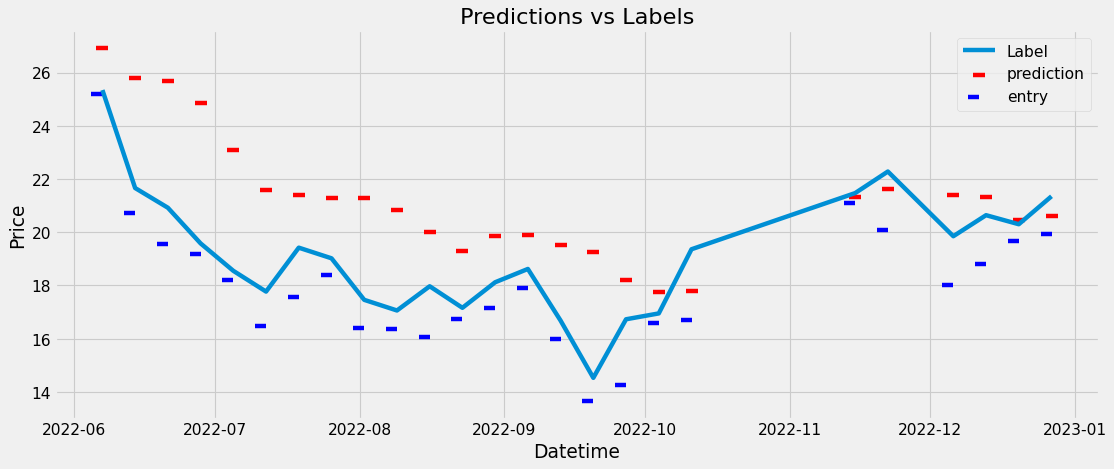

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
figure(figsize=(15, 6), dpi=80)

df_plot = trades_df_final[['Datetime','labels','prediction','Entry']]
df_plot = df_plot[df_plot.labels != 'nn']

x1 = df_plot['labels']
x2 = df_plot['prediction']
entry = df_plot['Entry']
y = df_plot['Datetime']

# plot lines
plt.plot(y, x1, label = "Label")
plt.scatter(y, x2, label = "prediction",color='red', s=100,marker='_')
plt.scatter(y, entry, label = "entry",color='blue', s=100,marker=0)
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.title('Predictions vs Labels')
plt.legend()
plt.show()

<b>Export dataframe with all variables</b>

In [28]:
import shutil 
# ticker period eod_data_api api_key sentiment sentiment_type aggr_function formation_window 
# target_window split_ratio test_ratio validation_ratio condition 
# indicator1 indicator2 indicator3 window_size twitter start_date end_date batch_size_train batch_size_valid shuffle entry_candle
today = datetime.today().date()

shutil.copy(f'{model_name}', f'./Temp/{model_name_}')

variables_dict = \
{
'model_name':[model_name_],
'Date':[today],
'ticker':[ticker],
'period':[period],
'eod_data_api':[eod_data_api],
'api_key':[api_key],
'sentiment':[sentiment],
'sentiment_type':[sentiment_type],
'aggr_function':[aggr_function],
'formation_window':[formation_window],
'target_window':[target_window],
'split_ratio':[split_ratio],
'test_ratio':[test_ratio],
'validation_ratio':[validation_ratio],
'condition':[condition],
'indicator1':[indicator1],
'indicator2':[indicator2],
'indicator3':[indicator3],
'window_size':[window_size],
'formation_window':[formation_window],
'twitter':[twitter],
'start_date':[start_date],
'end_date':[end_date],
'batch_size_train':[batch_size_train],
'batch_size_valid':[batch_size_valid],
'shuffle':[shuffle],
'entry_candle':[entry_candle],
'excel_reports':[excel_reports],
}

x_test.to_csv(f'./Temp/{ticker}_test_data.csv')
x_test_x.to_csv(f'./Temp/{ticker}_x_test_x.csv')
test_start = len(Dates)-x_test.shape[0]
Dates_test = Dates[test_start:]
Dates_test.to_csv(f'./Temp/{ticker}_dates_test.csv')
Dates.to_csv(f'./Temp/{ticker}_Dates.csv')
df = pd.DataFrame(variables_dict).transpose()
df.to_csv('./Temp/variables_df.csv')
df


,0
model_name,clb_model_2023-01-12_377.h5
Date,2023-01-12
ticker,clb
period,1wk
eod_data_api,False
api_key,631505e804ec58.42743136
sentiment,True
sentiment_type,CombinedVaderSentiment
aggr_function,median
formation_window,5


In [29]:
from final_evaluation import MakeSinglePrediction

#model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2019-03-18",
                        end_date="2022-11-27",
                        interval=period, #1wk
                        progress=False,
                        condition=condition,
                        timeperiod1=indicator1,
                        timeperiod2=indicator2,
                        timeperiod3=indicator3,
                        debug=False,
                        budget=10000,
                        penalization=0,
                        acceptance=0,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type = sentiment_type,
                        sentiment_aggr = aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.head(formation_window)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation


,Date,Open,High,Low,Close,EMA6,EMA24,EMA36,CombinedVaderSentiment
0,2022-10-17,16.709999,19.360001,16.660000,19.059999,16.827613,19.145711,20.861987,0.952914
1,2022-10-24,18.940001,21.500000,18.490000,19.330000,17.542581,19.160454,20.779177,0.868417
2,2022-10-31,19.190001,21.670000,18.840000,20.709999,18.447558,19.284418,20.775437,0.901200
3,2022-11-07,20.879999,23.160000,20.010000,22.969999,19.739684,19.579264,20.894062,0.829900
4,2022-11-14,22.809999,23.590000,21.450001,21.770000,20.319774,19.754523,20.941410,1.272800



Ticker:  clb
1/1 [==============================] - 2s 2s/step

Entry candle (Current Close)

Prediction is NOT profitable

Entry price:  21.77
Max Prediction:  21.33


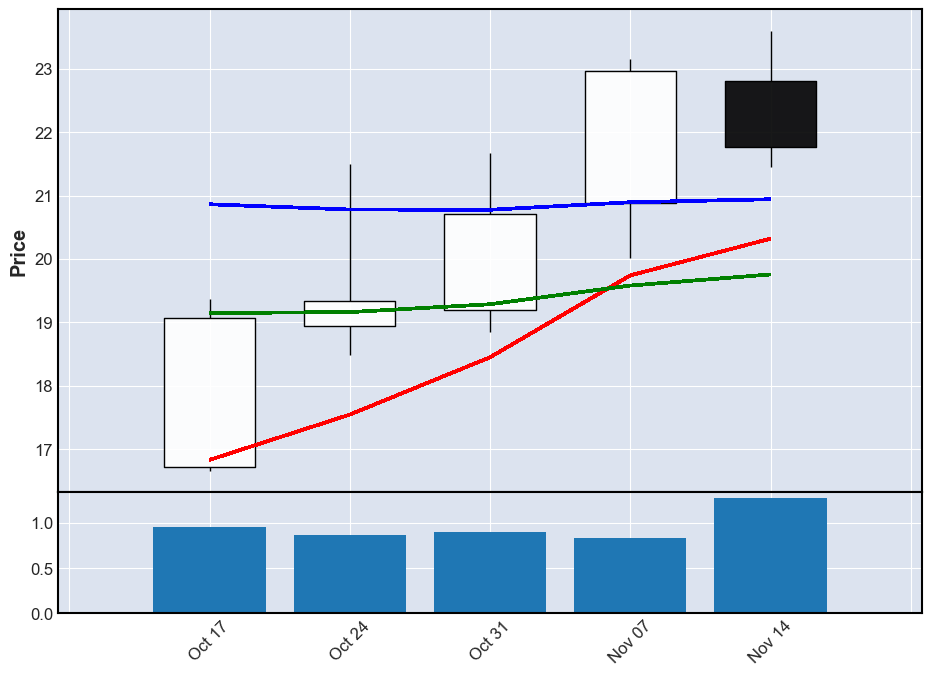

In [30]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment,indicator1=indicator1,indicator2=indicator2,indicator3=indicator3)
